# View aggregated results from sensitivity study

Authors: Raghav Kansal, Ludovico Mori

In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

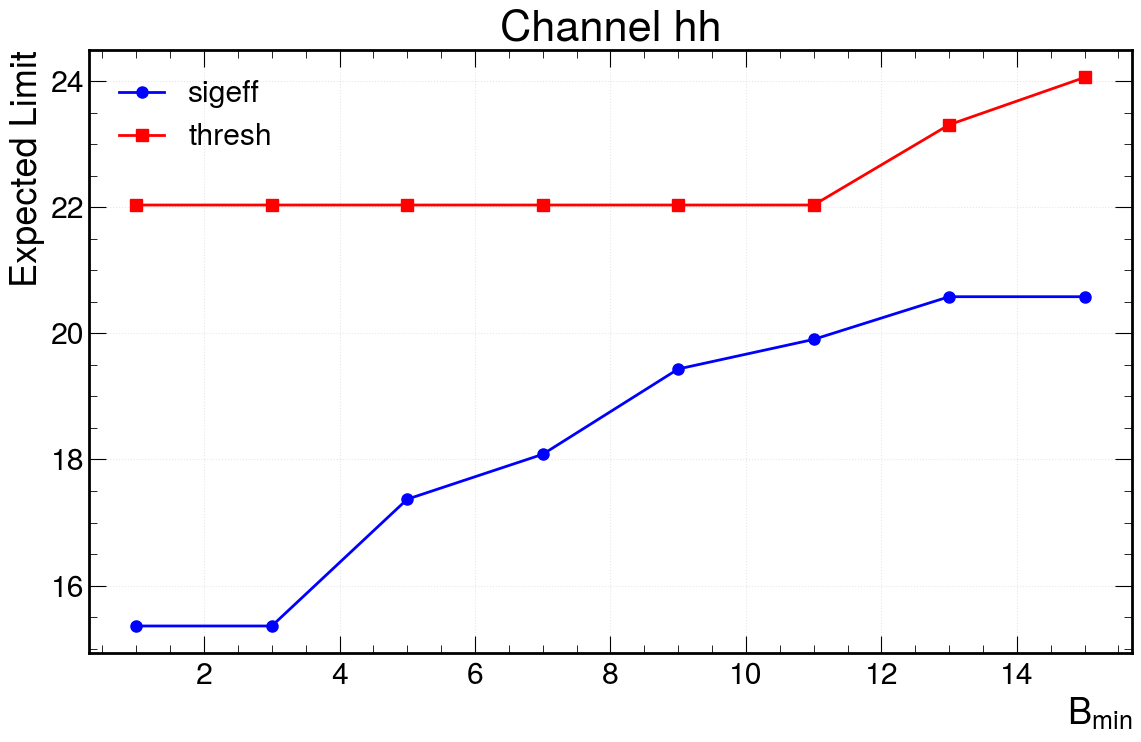

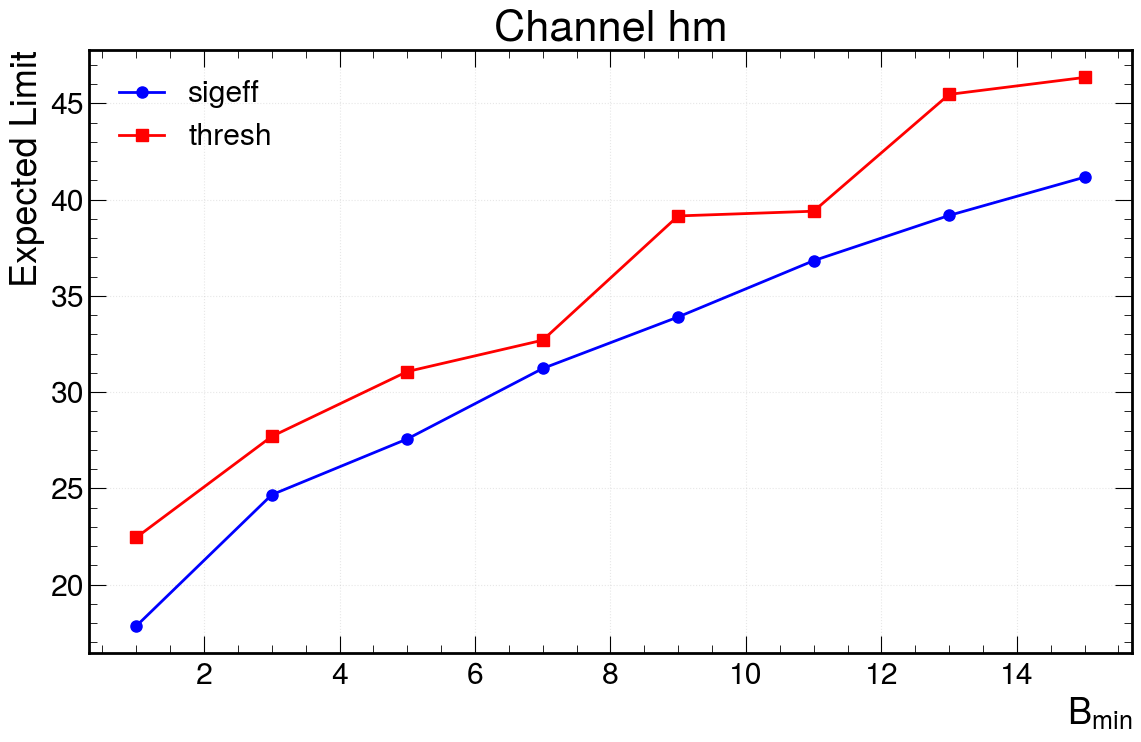

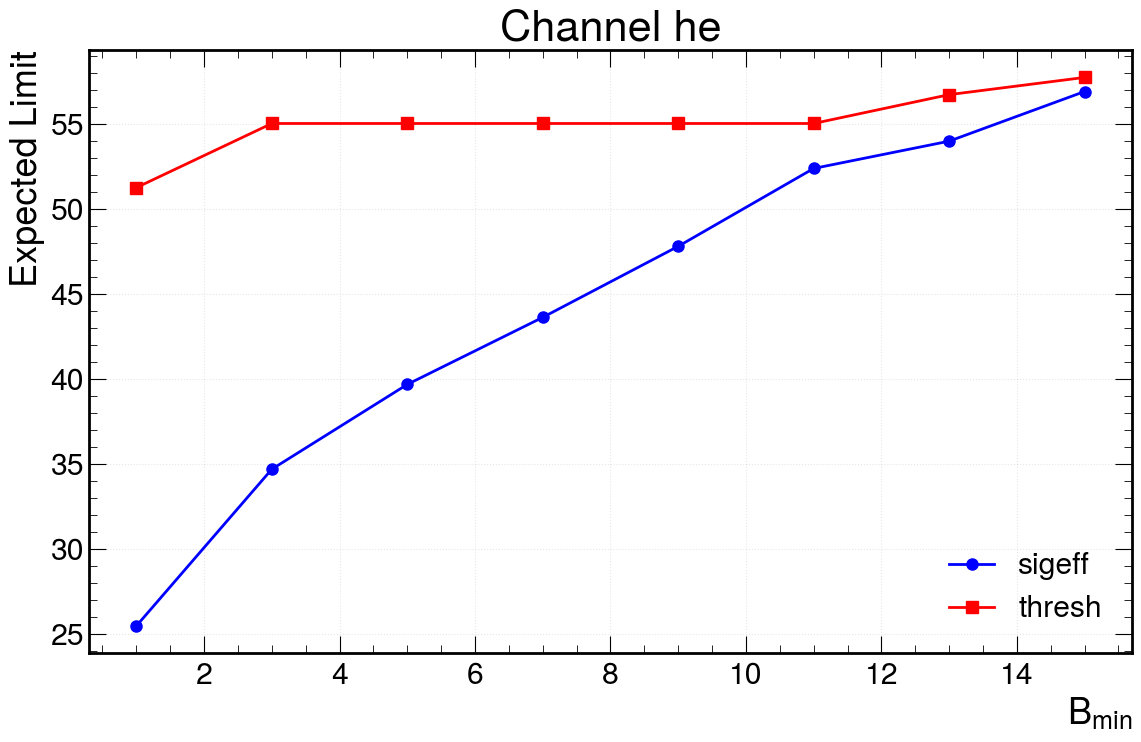

In [4]:
import numpy as np

# mode="29July25_loweta_lowreg"
mode = "ParT"

for channel in ["hh", "hm", "he"]:
    folder = Path(
        f"/home/users/lumori/bbtautau/plots/SensitivityStudy/2025-08-11/full_presel/ggfbbtt/{mode}/{channel}"
    )
    csvfiles = sorted(folder.glob("*.csv"))

    colors = ["blue", "red", "green", "orange", "purple", "brown", "pink", "gray"]
    markers = ["o", "s", "D", "^", "v", "<", ">", "p"]

    fig, ax = plt.subplots(figsize=(12, 8))

    for i, csvfile in enumerate(csvfiles):
        df = pd.read_csv(csvfile)
        # Try to find the Bmin columns (they are in the header, not as a column)
        # We'll use the first row as header, and the first column as index
        df = pd.read_csv(csvfile, index_col=0)
        # Find the row with the limits
        if "Limit" in df.index:
            limits = df.loc["Limit"].astype(float)
            bmin_labels = limits.index
            bmin_vals = [int(label.split("=")[-1]) for label in bmin_labels]
            name = csvfile.stem
            ax.plot(
                bmin_vals,
                limits.values,
                color=colors[i % len(colors)],
                marker=markers[i % len(markers)],
                linewidth=2,
                markersize=8,
                label=name[-6:],
            )
        else:
            print(f"Warning: 'Limit' row not found in {csvfile}")

    ax.set_title(f"Channel {channel}")
    ax.set_xlabel(
        "$B_{min}$",
    )
    ax.set_ylabel("Expected Limit")
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()